#  Detecting Gender Bias in BBC News Media Articles

In [135]:
import random
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
import json
import random
import numpy as np
from numpy import linalg as LA
import scipy.sparse
from sklearn.decomposition import PCA 
import pandas as pd 
import re 

## Loading and Inspecting the data 

In [136]:
fname= "data/bbc_data_raw.csv"
bbc = pd.read_csv(fname)

In [137]:
bbc.head()

,art_id,art_title,art_subhead,art_date,art_authors,art_tags,art_body,comments_allowed,art_media
0,851b1a18-afee-4e1b-98a8-8c9618643f6c,Hong Kong police evict protesters who stormed ...,Police firing tear gas have evicted protesters...,2 July 2019,2 July 2019,"Hong Kong anti-government protests, China, Hon...",\nPolice firing tear gas have evicted proteste...,False,bbc
1,a0f56cd2-95e6-43a1-8c02-cea9d2b56498,Hammond says Tory leadership candidates must '...,The chancellor has called on Tory leadership c...,1 July 2019,1 July 2019,"New UK prime minister, Boris Johnson, Philip H...",\nThe chancellor has called on Tory leadership...,False,bbc
2,5ef68f5c-1e9a-443f-a0ae-d7a097aa4e23,MPs call for urgent action over homophobia hat...,"MPs have called for ""urgent action"" from the g...",1 July 2019,1 July 2019,"Homophobia, Internet, Daniel Zeichner, LGBT, S...","\nMPs have called for ""urgent action"" from the...",False,bbc
3,bb077fc4-3383-439c-92fe-a02800310d91,"The Killers, Stormzy, Kylie Minogue, The Cure ...","The dust is settling, the debris is being clea...",1 July 2019,1 July 2019,"Glastonbury Festival, The Cure, Christine and ...","\nThe dust is settling, the debris is being cl...",True,bbc
4,bef68156-a99b-4ee6-b047-a9a36be6f74d,Jeremy Corbyn: No 10 criticises civil servants...,"Downing Street has said it would be ""unaccepta...",1 July 2019,1 July 2019,"Jeremy Corbyn, Labour Party, Civil Service","\nDowning Street has said it would be ""unaccep...",False,bbc


### Function to retrieve text from each row

In [138]:
#define a function retrieving the text for each entry
def get_text(df_name,art_id):
    
    try:
        bbc_art_id = df_name[df_name['art_id']==art_id]
        text_pre = bbc_art_id.art_body
        text = text_pre[0]
        text= text.split()

    except:
        raise Exception ("not found")
    
    return text 

art_id = bbc.art_id[0]
text = get_text( bbc,art_id)

text[1:6]

['firing', 'tear', 'gas', 'have', 'evicted']

In [139]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

stop_words = stopwords.words('english')
stop_words.append('also')
stop_words.append('early')

def freq(str):
  
    #str = str.split()         
    str2 = []
    count = []
    word_freq= {}
  
    # loop till string values present in list str
    for i in str:    
        if i not in str2 and i not in stop_words :
            str2.append(i) 

              
    for i in range(0, len(str2)):
  
        # count the frequency of each word(present 
        # in str2) in str and print
        count.append(str.count(str2[i]))
        print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        word_freq [str2[i]]=  str.count(str2[i])
    return str2, count, word_freq

un_text, count, word_freq = freq(text)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [140]:
import operator
cd = sorted(word_freq.items(),key=operator.itemgetter(1),reverse=True)
cd

[('protesters', 12),
 ('Hong', 11),
 ('said', 9),
 ('police', 8),
 ('Lam', 6),
 ('would', 6),
 ("Kong's", 5),
 ('back', 5),
 ('Ms', 5),
 ('building', 4),
 ('Kong', 4),
 ('use', 4),
 ('building,', 4),
 ('outside', 4),
 ('tear', 3),
 ('gas', 3),
 ('protest', 3),
 ('warning', 3),
 ('clear', 3),
 ('extradition', 3),
 ('In', 3),
 ('thousands', 3),
 ('peaceful', 3),
 ('used', 3),
 ('held', 3),
 ('press', 3),
 ('planned', 3),
 ('Police', 2),
 ('stormed', 2),
 ('hours', 2),
 ('breaking', 2),
 ('anniversary', 2),
 ('China', 2),
 ('midnight', 2),
 ('hundreds', 2),
 ('follows', 2),
 ('weeks', 2),
 ('law.', 2),
 ('The', 2),
 ('protests', 2),
 ('parliament', 2),
 ('Hundreds', 2),
 ('took', 2),
 ('earlier', 2),
 ('-', 2),
 ('law', 2),
 ('critics', 2),
 ('could', 2),
 ('political', 2),
 ('mainland', 2),
 ('China.', 2),
 ('12', 2),
 ('Carrie', 2),
 ('conference', 2),
 ('time', 2),
 ('"extreme', 2),
 ('broke', 2),
 ('demonstrations', 2),
 ('place', 2),
 ('government', 2),
 ('raised', 2),
 ('demonstrato

#  Word Embeddings

A word embedding is a represenation of a word as a typically high-dimensional real-valued vector. The idea is that vectors similar to each other represent words (semantically) similar to each other, therefore a vector representing the word 'bus' should, to a certain degree,  be similar (or close) to a vector representing the word 'truck'. <br> There are various techniques to *train* word vectors on a given data set, such as: word2vec, glove, BERT, GPT-3 etc. <br> We will be using English word embeddings here in this course.  

In [141]:
fname= 'data/w2v_gnews_small.txt'

def load(fname):
    word = []
    vector = []
    with open (fname,"r") as file:
        for line in file:
            s = line.split()
            word.append(s[0])
            vector.append(s[1:])
    vector = np.array(vector,'float32')
    return vector,word #,embeddings_index
vector, word =load(fname)

In [142]:
#v is a function that returns a vector that corresponds to a word
def v(word_):
    return vector[word.index(word_)]

target_word= 'he'
ents_vector =  v(target_word)
print("Word {0} corresponds to a vector {1}".format(target_word, ents_vector))

Word he corresponds to a vector [ 1.09257e-01  7.26531e-02 -1.08841e-02 -1.66381e-02  1.76087e-02
 -4.79733e-02 -5.65696e-02 -3.03646e-02  9.37281e-02 -1.91338e-02
 -8.63103e-03 -1.04266e-01  3.43855e-02 -2.53731e-02 -1.61944e-01
  2.46799e-02 -1.76087e-02  4.10407e-02  5.96199e-02 -1.18547e-02
 -4.09020e-03  7.07120e-02  9.42827e-03 -3.11965e-03 -3.66039e-02
 -9.48373e-02 -6.59979e-02 -1.49050e-02  1.04820e-01  2.10750e-02
  1.35185e-02  9.26189e-02 -7.97243e-03  1.39344e-02  4.79733e-02
 -1.74700e-02  8.42998e-02 -5.06076e-03  2.12136e-02  1.17160e-02
  1.60835e-01 -2.41253e-02  1.71927e-01  6.23930e-03  2.73142e-02
  7.20985e-02 -7.04347e-02  1.64995e-02  2.68983e-02  3.82677e-02
  7.65354e-02  4.82506e-02 -1.78860e-02 -6.15611e-02 -2.53731e-02
 -1.52516e-02 -1.08148e-02 -3.60493e-02 -1.58062e-02 -6.57206e-02
  1.20904e-01  1.20904e-01 -6.62059e-03  1.06761e-02  3.28603e-02
  3.77131e-02 -2.66210e-02 -4.49229e-02 -7.03654e-03  7.15439e-02
  3.74358e-02 -5.67603e-04  1.65688e-02  2.0

## Looking for Racial or Gender Bias 

In [143]:
def diff(word1, word2):
    # she 
    v = np.subtract(vector[word.index(word1)], vector[word.index(word2)])
    return v/LA.norm(v)

In [144]:
word1= 'she'
word2= 'he'

gender_vec = diff(word1,word2)
print("gender vector = {0}".format(gender_vec))

gender vector = [-7.81573057e-02 -9.91111174e-02 -5.14597893e-02 -1.30578305e-03
  4.66136821e-02 -1.71859246e-02  3.14941853e-02  7.93881901e-03
 -1.49259776e-01  2.72160545e-02  4.28704992e-02  4.12044749e-02
 -1.84853394e-02 -2.38013398e-02  1.07781373e-01  1.32010574e-03
  1.53102446e-02 -7.33512193e-02 -3.34354714e-02 -2.51800977e-02
  2.29593106e-02 -3.35822143e-02 -3.48759145e-02 -4.09578793e-02
  1.56664513e-02  2.74356678e-02 -2.29296926e-03 -2.01871339e-02
 -5.35323545e-02 -1.17031537e-01 -4.65185456e-02 -1.21805243e-01
 -1.01307660e-01 -6.44113496e-02 -4.48651761e-02 -8.18657428e-02
 -1.39323808e-02 -7.28097139e-03 -2.48276833e-02 -3.50603126e-02
 -1.08046666e-01  4.15286561e-03 -6.87752962e-02 -4.93069701e-02
 -2.64373664e-02 -3.62398685e-03  3.47928554e-02  4.15167138e-02
  2.51193997e-02  8.56912509e-02  2.33755521e-02 -7.40442276e-02
 -4.59206756e-03  7.69986808e-02 -5.91501333e-02  7.09984638e-03
 -3.65344360e-02 -2.51445193e-02  4.83558215e-02 -1.78666599e-02
  8.03839

In [145]:
word1= 'white'
word2= 'black'

racial_vec = diff(word1,word2)
print("racial vector = {0}".format(racial_vec))

racial vector = [-7.81573057e-02 -9.91111174e-02 -5.14597893e-02 -1.30578305e-03
  4.66136821e-02 -1.71859246e-02  3.14941853e-02  7.93881901e-03
 -1.49259776e-01  2.72160545e-02  4.28704992e-02  4.12044749e-02
 -1.84853394e-02 -2.38013398e-02  1.07781373e-01  1.32010574e-03
  1.53102446e-02 -7.33512193e-02 -3.34354714e-02 -2.51800977e-02
  2.29593106e-02 -3.35822143e-02 -3.48759145e-02 -4.09578793e-02
  1.56664513e-02  2.74356678e-02 -2.29296926e-03 -2.01871339e-02
 -5.35323545e-02 -1.17031537e-01 -4.65185456e-02 -1.21805243e-01
 -1.01307660e-01 -6.44113496e-02 -4.48651761e-02 -8.18657428e-02
 -1.39323808e-02 -7.28097139e-03 -2.48276833e-02 -3.50603126e-02
 -1.08046666e-01  4.15286561e-03 -6.87752962e-02 -4.93069701e-02
 -2.64373664e-02 -3.62398685e-03  3.47928554e-02  4.15167138e-02
  2.51193997e-02  8.56912509e-02  2.33755521e-02 -7.40442276e-02
 -4.59206756e-03  7.69986808e-02 -5.91501333e-02  7.09984638e-03
 -3.65344360e-02 -2.51445193e-02  4.83558215e-02 -1.78666599e-02
  8.03839

# Load Professions Data 

In [146]:
fname= 'data/professions.txt'
def load_prof(fname):
    word = []
    with open (fname,"r") as file:
        for line in file:
            s = line.split()
            word.append(s[0])
    return word
word_prof =load_prof(fname)

In [147]:
she_he_vec =sorted([(v(w).dot(gender_vec), w) for w in word_prof])

In [148]:
# Gender Bias in professions
print("Top male: ")
for i in range(0,21):
    print("she-he: {}".format(she_he_vec[i]))
print("\nTop Female: ")
for i in reversed(range(1, 21)):
    print("she-he: {} ".format(she_he_vec[-i]))

Top male: 
she-he: (-0.23798442, 'maestro')
she-he: (-0.21665451, 'statesman')
she-he: (-0.2075867, 'skipper')
she-he: (-0.20267202, 'protege')
she-he: (-0.2020676, 'businessman')
she-he: (-0.19492391, 'sportsman')
she-he: (-0.18836352, 'philosopher')
she-he: (-0.18073659, 'marksman')
she-he: (-0.1728986, 'captain')
she-he: (-0.16785556, 'architect')
she-he: (-0.16702037, 'financier')
she-he: (-0.16313638, 'warrior')
she-he: (-0.15280864, 'major_leaguer')
she-he: (-0.15001445, 'trumpeter')
she-he: (-0.14718868, 'broadcaster')
she-he: (-0.14637242, 'magician')
she-he: (-0.14401694, 'fighter_pilot')
she-he: (-0.13782284, 'boss')
she-he: (-0.13718201, 'industrialist')
she-he: (-0.13684885, 'pundit')
she-he: (-0.13590316, 'lieutenant')

Top Female: 
she-he: (0.19714224, 'interior_designer') 
she-he: (0.20833439, 'housekeeper') 
she-he: (0.21560377, 'stylist') 
she-he: (0.22363171, 'bookkeeper') 
she-he: (0.23776126, 'maid') 
she-he: (0.24125955, 'nun') 
she-he: (0.2478258, 'nanny') 
she-he

### We want to find examples like this:

In [149]:
x = v('himself') - v('herself')
x = x / np.linalg.norm(x)
x.dot(gender_vec/np.linalg.norm(gender_vec))

-0.92134476

In [150]:
# According to the research, threshold should be set to 1
# we check 50000 words
# we are looking for the top 500 neighbors
# the goal is to find words vectors close to each other
# e.g. $\vec{nurse}$ will be in close proximity to $\vec{woman}$.

    
def compute_neighbors_(thresh, max_words):
    thresh = float(thresh) 
    print("Computing neighbors")
    
    vecs = vector[:max_words]
    vecs=np.asarray(vecs)
    # Find similarity between words (cosine similarity)
    dots = vecs.dot(vecs.T)
    
    # create a sparse matrix choosing only those elements with a value above the threshold (similarity >0.5)
    dots = scipy.sparse.csr_matrix(dots * (dots >= 1-thresh/2))
    from collections import Counter
    rows, cols = dots.nonzero()
    nums = list(Counter(rows).values())
    
    # Print average num of values satisfying the similarity thresh for each word
    print("Mean:", np.mean(nums)-1)
    print("Median:", np.median(nums)-1)
    rows, cols, vecs = zip(*[(i, j, vecs[i]-vecs[j]) for i, j, x in zip(rows, cols, dots.data) if i<j])
    v_ = np.array([v/np.linalg.norm(v) for v in vecs])
    return rows, cols,v_



def best_analogies_dist_thresh(v,thresh=1, topn=100, max_words=50000): 
    vecs = vector[:max_words]
    vecs=np.asarray(vecs)
    vocab=word[:max_words]
    rows, cols, vecs = compute_neighbors_(thresh, max_words)

    # Find the cosine similarity of "vector of interest" with neighbors
    scores = vecs.dot(v/np.linalg.norm(v))
    pi = np.argsort(-abs(scores))
    ans = []
    for i in pi:
        row = rows[i] if scores[i] > 0 else cols[i]
        col = cols[i] if scores[i] > 0 else rows[i]
        ans.append((vocab[row], vocab[col], abs(scores[i])))
        if len(ans)==topn:
            break

    return ans

In [151]:
gender_check = best_analogies_dist_thresh(gender_vec, 1, 100, 50000)
gender_check

Computing neighbors
Mean: 10.219732808538016
Median: 7.0


[('she', 'he', 1.0),
 ('herself', 'himself', 0.9213448),
 ('her', 'his', 0.90778065),
 ('woman', 'man', 0.7530543),
 ('daughter', 'son', 0.67479837),
 ('businesswoman', 'businessman', 0.6597636),
 ('girl', 'boy', 0.65813243),
 ('actress', 'actor', 0.6525245),
 ('chairwoman', 'chairman', 0.63974184),
 ('heroine', 'hero', 0.62939006),
 ('mother', 'father', 0.6074057),
 ('spokeswoman', 'spokesman', 0.5979807),
 ('sister', 'brother', 0.59732914),
 ('girls', 'boys', 0.5955372),
 ('sisters', 'brothers', 0.59103584),
 ('queen', 'king', 0.584144),
 ('daughter', 'nephew', 0.5752912),
 ('daughter', 'younger_brother', 0.5704078),
 ('sister', 'younger_brother', 0.56422186),
 ('niece', 'nephew', 0.56413656),
 ('councilwoman', 'councilman', 0.56006515),
 ('daughter', 'father', 0.55387473),
 ('daughter', 'brother', 0.55299515),
 ('motherhood', 'fatherhood', 0.5526026),
 ('women', 'men', 0.5513932),
 ('petite', 'lanky', 0.5513096),
 ('ovarian_cancer', 'prostate_cancer', 0.54639226),
 ('Anne', 'John', 

In [152]:
diff_vec = diff("he", "she")

gender_direction = sorted([(vector[word.index(w)].dot(diff_vec), w) for w in word_prof])

points = []
names = []

print("Top Female: ")
for i in range(0,20):
    points.append(gender_direction[i][0])
    names.append(gender_direction[i][1])
    print(gender_direction[i])
    
print("\nTop Male: ")
for i in range(1, 21):
    points.append(gender_direction[-i][0])
    names.append(gender_direction[-i][1])
    print(gender_direction[-i])


Top Female: 
(-0.35965407, 'businesswoman')
(-0.3523514, 'actress')
(-0.34036592, 'housewife')
(-0.3043797, 'homemaker')
(-0.30426234, 'registered_nurse')
(-0.28085965, 'nurse')
(-0.27540293, 'waitress')
(-0.27317625, 'receptionist')
(-0.26647124, 'librarian')
(-0.25718823, 'socialite')
(-0.25276464, 'ballerina')
(-0.24946159, 'paralegal')
(-0.24929334, 'hairdresser')
(-0.2478258, 'nanny')
(-0.24125955, 'nun')
(-0.23776126, 'maid')
(-0.22363171, 'bookkeeper')
(-0.21560377, 'stylist')
(-0.20833439, 'housekeeper')
(-0.19714224, 'interior_designer')

Top Male: 
(0.23798442, 'maestro')
(0.21665451, 'statesman')
(0.2075867, 'skipper')
(0.20267202, 'protege')
(0.2020676, 'businessman')
(0.19492391, 'sportsman')
(0.18836352, 'philosopher')
(0.18073659, 'marksman')
(0.1728986, 'captain')
(0.16785556, 'architect')
(0.16702037, 'financier')
(0.16313638, 'warrior')
(0.15280864, 'major_leaguer')
(0.15001445, 'trumpeter')
(0.14718868, 'broadcaster')
(0.14637242, 'magician')
(0.14401694, 'fighter_pi

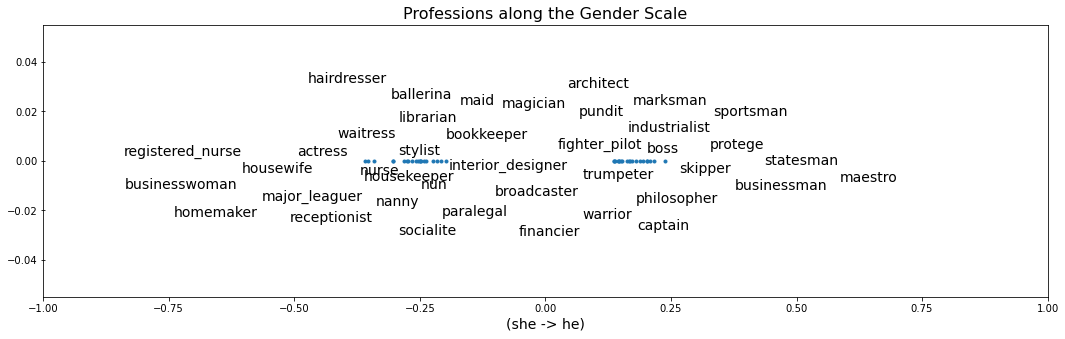

In [153]:
from adjustText import adjust_text

y = np.zeros(len(points))
fig, ax = plt.subplots()
ax.set_title('Professions along the Gender Scale', fontsize=16)
fig.set_size_inches(18, 5)
ax.set_xlim([-1, 1])
ax.set_xlabel("(she -> he)", fontsize=14)
ax.plot(points, y, '.')
plt.tick_params(axis='y', which='both', direction='inout', labelleft='off')
plt.rcParams.update({'font.size': 14})

texts = []
for x, y, s in zip(points, y, names):
    texts.append(plt.text(x, y, s))

adjust_text(texts)
plt.show()

In [154]:
diff_vec = diff("rich", "poor")

wealth_direction = sorted([(vector[word.index(w)].dot(diff_vec), w) for w in word_prof])

points = []
names = []

print("Top Poor: ")
for i in range(0,20):
    points.append(wealth_direction[i][0])
    names.append(wealth_direction[i][1])
    print(wealth_direction[i])
    
print("\nTop Rich: ")
for i in range(1, 20):
    points.append(wealth_direction[-i][0])
    names.append(wealth_direction[-i][1])
    print(wealth_direction[-i])


Top Poor: 
(-0.12895197, 'undersecretary')
(-0.10781515, 'nun')
(-0.10425636, 'doctor')
(-0.10407881, 'captain')
(-0.10174304, 'goalkeeper')
(-0.09976843, 'inspector')
(-0.09796615, 'coach')
(-0.094705015, 'skipper')
(-0.092649445, 'physician')
(-0.09143068, 'marksman')
(-0.08806105, 'priest')
(-0.086152926, 'surgeon')
(-0.08557175, 'caretaker')
(-0.084826164, 'worker')
(-0.08104027, 'cameraman')
(-0.08086354, 'technician')
(-0.07909091, 'psychologist')
(-0.07787307, 'understudy')
(-0.07468489, 'chaplain')
(-0.07385655, 'epidemiologist')

Top Rich: 
(0.22717035, 'baron')
(0.16991594, 'tycoon')
(0.15744662, 'socialite')
(0.13629246, 'collector')
(0.13585998, 'philanthropist')
(0.13377324, 'industrialist')
(0.13305004, 'geologist')
(0.12858883, 'investment_banker')
(0.12002501, 'entrepreneur')
(0.11753509, 'jeweler')
(0.11436336, 'banker')
(0.11288465, 'businessman')
(0.1120027, 'businesswoman')
(0.1077776, 'restaurateur')
(0.104970284, 'archaeologist')
(0.100448504, 'dermatologist')
(0.

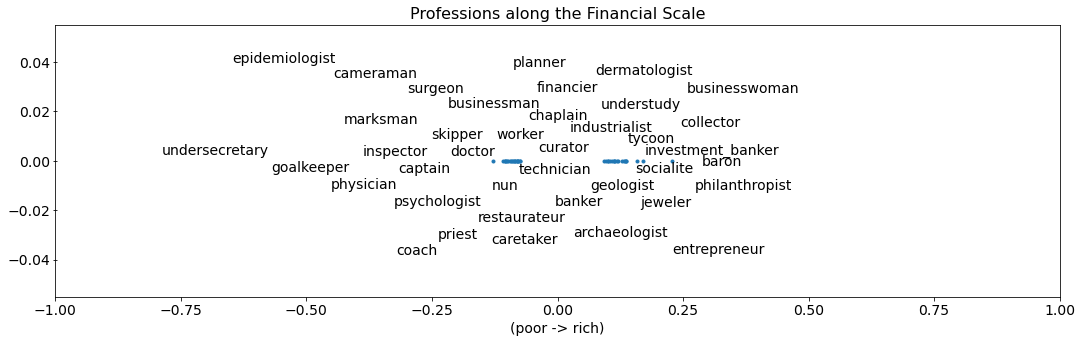

In [155]:
from adjustText import adjust_text

y = np.zeros(len(points))
fig, ax = plt.subplots()
ax.set_title('Professions along the Financial Scale', fontsize=16)
fig.set_size_inches(18, 5)
ax.set_xlim([-1, 1])
ax.set_xlabel("(poor -> rich)", fontsize=14)
ax.plot(points, y, '.')
plt.tick_params(axis='y', which='both', direction='inout', labelleft='off')
plt.rcParams.update({'font.size': 14})

texts = []
for x, y, s in zip(points, y, names):
    texts.append(plt.text(x, y, s))

adjust_text(texts)
plt.show()

In [156]:
diff_vec = diff("black", "white")

race_direction = sorted([(vector[word.index(w)].dot(diff_vec), w) for w in word_prof])

points = []
names = []

print("Top white: ")
for i in range(0,20):
    points.append(race_direction[i][0])
    names.append(race_direction[i][1])
    print(race_direction[i])
    
print("\nTop black: ")
for i in range(1, 20):
    points.append(race_direction[-i][0])
    names.append(race_direction[-i][1])
    print(race_direction[-i])


Top white: 
(-0.12514739, 'monk')
(-0.08485688, 'graphic_designer')
(-0.08234753, 'cinematographer')
(-0.08089294, 'waiter')
(-0.07820428, 'salesman')
(-0.077655345, 'housekeeper')
(-0.07680837, 'illustrator')
(-0.071323365, 'protester')
(-0.07061996, 'inventor')
(-0.07056698, 'sheriff_deputy')
(-0.07052155, 'receptionist')
(-0.07020265, 'architect')
(-0.06543374, 'priest')
(-0.06456168, 'singer_songwriter')
(-0.06338275, 'nanny')
(-0.062355064, 'painter')
(-0.06225293, 'soft_spoken')
(-0.060753413, 'naturalist')
(-0.059222773, 'guitarist')
(-0.059002735, 'neurologist')

Top black: 
(0.1660331, 'treasurer')
(0.1618001, 'councilman')
(0.15271962, 'secretary')
(0.14631994, 'commissioner')
(0.1425387, 'jeweler')
(0.12368176, 'comic')
(0.12097987, 'minister')
(0.12091689, 'marshal')
(0.11328633, 'legislator')
(0.1058089, 'alderman')
(0.100635804, 'surgeon')
(0.10058211, 'comedian')
(0.1000095, 'provost')
(0.09969124, 'artiste')
(0.09817031, 'chancellor')
(0.09804028, 'educator')
(0.0957581

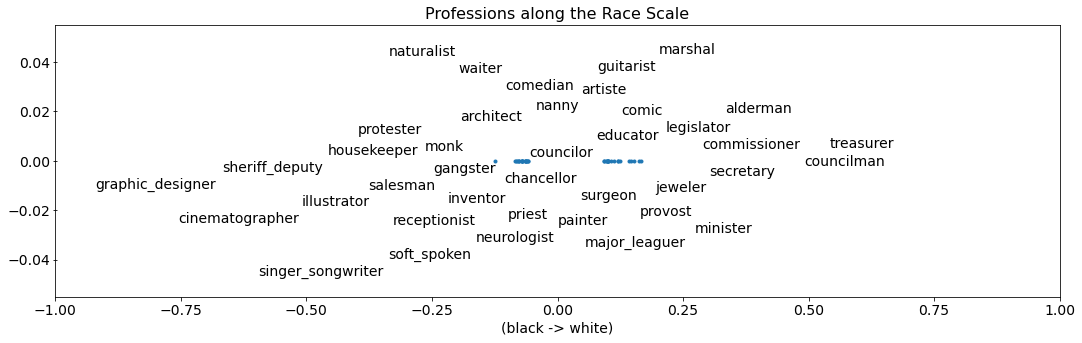

In [157]:
from adjustText import adjust_text

y = np.zeros(len(points))
fig, ax = plt.subplots()
ax.set_title('Professions along the Race Scale', fontsize=16)
fig.set_size_inches(18, 5)
ax.set_xlim([-1, 1])
ax.set_xlabel("(black -> white)", fontsize=14)
ax.plot(points, y, '.')
plt.tick_params(axis='y', which='both', direction='inout', labelleft='off')
plt.rcParams.update({'font.size': 14})

texts = []
for x, y, s in zip(points, y, names):
    texts.append(plt.text(x, y, s))

adjust_text(texts)
plt.show()

In [158]:
diff_vec = diff("conservative", "liberal")

party_direction = sorted([(vector[word.index(w)].dot(diff_vec), w) for w in word_prof])

points = []
names = []

print("Top liberal: ")
for i in range(0,20):
    points.append(party_direction[i][0])
    names.append(party_direction[i][1])
    print(party_direction[i])
    
print("\nTop conservative: ")
for i in range(1, 20):
    points.append(party_direction[-i][0])
    names.append(party_direction[-i][1])
    print(party_direction[-i])


Top liberal: 
(-0.18197647, 'nanny')
(-0.16209331, 'lyricist')
(-0.15558845, 'critic')
(-0.15394719, 'cellist')
(-0.15214199, 'boxer')
(-0.15191613, 'sportswriter')
(-0.14994745, 'protester')
(-0.14740318, 'rabbi')
(-0.14457408, 'filmmaker')
(-0.14141501, 'butler')
(-0.13886353, 'pianist')
(-0.13881108, 'artiste')
(-0.13536981, 'citizen')
(-0.13423988, 'composer')
(-0.13146086, 'bureaucrat')
(-0.13118342, 'assassin')
(-0.12655431, 'cab_driver')
(-0.12399827, 'screenwriter')
(-0.12388671, 'violinist')
(-0.12380402, 'student')

Top conservative: 
(0.14125252, 'analyst')
(0.12406665, 'archaeologist')
(0.11573606, 'treasurer')
(0.103130184, 'manager')
(0.09261003, 'president')
(0.09181061, 'principal')
(0.08473255, 'broker')
(0.08289893, 'physician')
(0.0814833, 'consultant')
(0.07739767, 'broadcaster')
(0.07696753, 'evangelist')
(0.07210583, 'performer')
(0.06713597, 'soft_spoken')
(0.06570739, 'chaplain')
(0.06561392, 'preacher')
(0.06284161, 'jeweler')
(0.062609375, 'banker')
(0.0615615

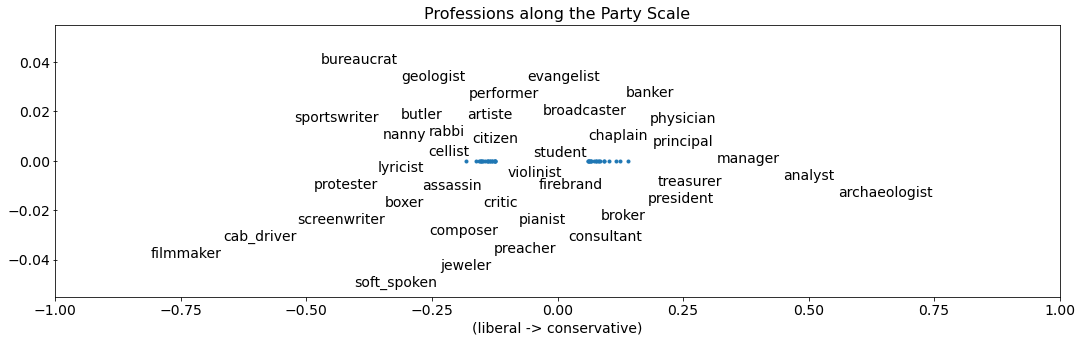

In [159]:
from adjustText import adjust_text

y = np.zeros(len(points))
fig, ax = plt.subplots()
ax.set_title('Professions along the Party Scale', fontsize=16)
fig.set_size_inches(18, 5)
ax.set_xlim([-1, 1])
ax.set_xlabel("(liberal -> conservative)", fontsize=14)
ax.plot(points, y, '.')
plt.tick_params(axis='y', which='both', direction='inout', labelleft='off')
plt.rcParams.update({'font.size': 14})

texts = []
for x, y, s in zip(points, y, names):
    texts.append(plt.text(x, y, s))

adjust_text(texts)
plt.show()

In [160]:
diff_vec =  diff("young", "old")

age_direction = sorted([(vector[word.index(w)].dot(diff_vec), w) for w in word_prof])

points = []
names = []

print("Top old: ")
for i in range(0,20):
    points.append(age_direction[i][0])
    names.append(age_direction[i][1])
    print(age_direction[i])
    
print("\nTop young: ")
for i in range(1, 20):
    points.append(age_direction[-i][0])
    names.append(age_direction[-i][1])
    print(age_direction[-i])

Top old: 
(-0.19255656, 'electrician')
(-0.18189405, 'worker')
(-0.17679167, 'carpenter')
(-0.1716195, 'tycoon')
(-0.17108077, 'technician')
(-0.16731863, 'employee')
(-0.16587996, 'crooner')
(-0.16483733, 'mechanic')
(-0.16218513, 'doctoral_student')
(-0.15937448, 'baron')
(-0.15634105, 'acquaintance')
(-0.15347457, 'housewife')
(-0.15010077, 'salesman')
(-0.1467945, 'accountant')
(-0.14407618, 'homemaker')
(-0.14153701, 'trucker')
(-0.14077653, 'laborer')
(-0.13989902, 'inspector')
(-0.13846818, 'businessman')
(-0.13220415, 'dentist')

Top young: 
(0.15560019, 'tutor')
(0.14031482, 'character')
(0.0951538, 'narrator')
(0.07801673, 'counselor')
(0.072006576, 'comic')
(0.06766991, 'lyricist')
(0.0675329, 'sociologist')
(0.065912224, 'coach')
(0.058330055, 'protagonist')
(0.05674072, 'athlete')
(0.05593425, 'playwright')
(0.0553778, 'assassin')
(0.052759685, 'advocate')
(0.05146596, 'servant')
(0.050858416, 'barrister')
(0.050259855, 'psychologist')
(0.041071422, 'cinematographer')
(0.0

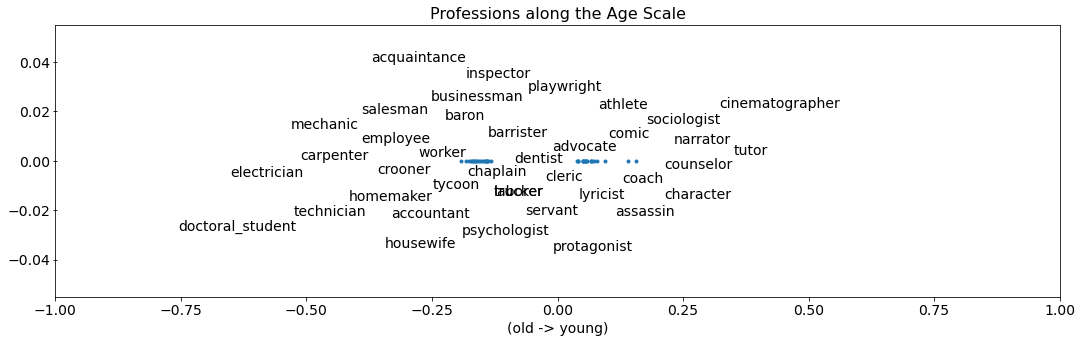

In [161]:
from adjustText import adjust_text

y = np.zeros(len(points))
fig, ax = plt.subplots()
ax.set_title('Professions along the Age Scale', fontsize=16)
fig.set_size_inches(18, 5)
ax.set_xlim([-1, 1])
ax.set_xlabel("(old -> young)", fontsize=14)
ax.plot(points, y, '.')
plt.tick_params(axis='y', which='both', direction='inout', labelleft='off')
plt.rcParams.update({'font.size': 14})

texts = []
for x, y, s in zip(points, y, names):
    texts.append(plt.text(x, y, s))

adjust_text(texts)
plt.show()